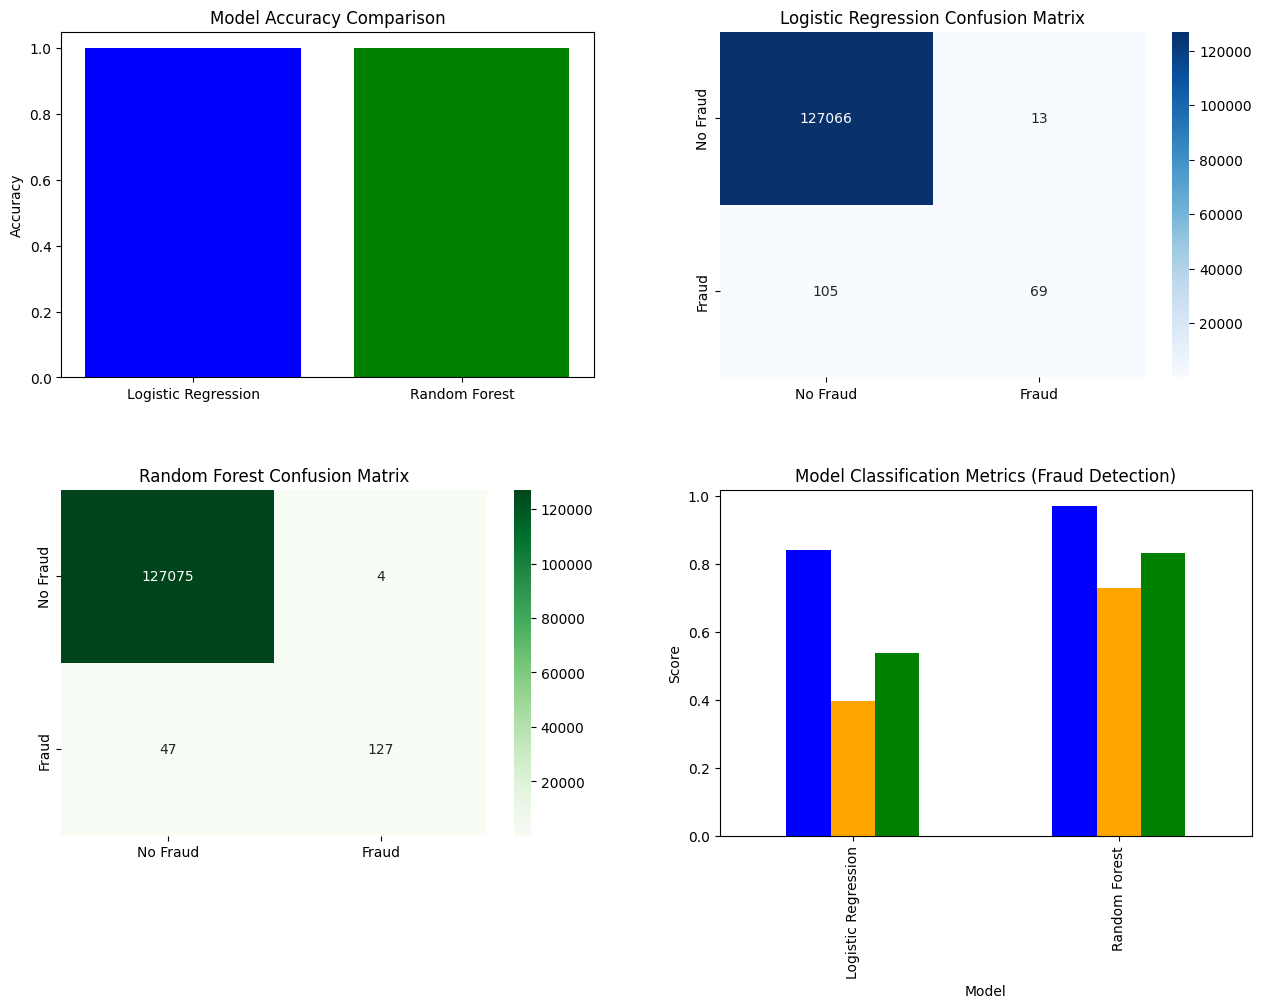

In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the engineered dataset
df = pd.read_csv('engineered_transactions.csv')

# Sample a subset of the data for faster processing (adjust the sample size as needed)
df_sampled = df.sample(frac=0.1, random_state=42)  # Sample 10% of the data

# Define features and target
X = df_sampled[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'amount_percentage', 'balance_diff', 'type']]
y = df_sampled['isFraud']

# One-hot encode 'type' column (since it's categorical)
X = pd.get_dummies(X, columns=['type'], drop_first=True)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (important for many models like Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the models with default settings
logreg = LogisticRegression(max_iter=1000, random_state=42)  # Increased max_iter to ensure convergence
rf = RandomForestClassifier(random_state=42, n_jobs=-1)  # Use all CPUs for Random Forest

# Train the models
logreg.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test_scaled)

# Create a figure for the dashboard
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.tight_layout(pad=6.0)

# Data for accuracy plot
accuracy_data = {
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, y_pred_logreg), accuracy_score(y_test, y_pred_rf)]
}

# Plot 1: Accuracy comparison
axes[0, 0].bar(accuracy_data['Model'], accuracy_data['Accuracy'], color=['blue', 'green'])
axes[0, 0].set_title('Model Accuracy Comparison')
axes[0, 0].set_ylabel('Accuracy')

# Data for confusion matrix plot
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot 2: Confusion Matrix (Logistic Regression)
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'], ax=axes[0, 1])
axes[0, 1].set_title('Logistic Regression Confusion Matrix')

# Plot 3: Confusion Matrix (Random Forest)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'], ax=axes[1, 0])
axes[1, 0].set_title('Random Forest Confusion Matrix')

# Metrics for Precision, Recall, F1-Score (both models)
metrics_data = {
    'Model': ['Logistic Regression', 'Random Forest'],
    'Precision': [classification_report(y_test, y_pred_logreg, output_dict=True)['1']['precision'], 
                  classification_report(y_test, y_pred_rf, output_dict=True)['1']['precision']],
    'Recall': [classification_report(y_test, y_pred_logreg, output_dict=True)['1']['recall'], 
               classification_report(y_test, y_pred_rf, output_dict=True)['1']['recall']],
    'F1-Score': [classification_report(y_test, y_pred_logreg, output_dict=True)['1']['f1-score'], 
                 classification_report(y_test, y_pred_rf, output_dict=True)['1']['f1-score']]
}

# Plot 4: Classification Metrics (Precision, Recall, F1-Score)
metrics_df = pd.DataFrame(metrics_data)
metrics_df.set_index('Model', inplace=True)

metrics_df.plot(kind='bar', ax=axes[1, 1], color=['blue', 'orange', 'green'], legend=False)
axes[1, 1].set_title('Model Classification Metrics (Fraud Detection)')
axes[1, 1].set_ylabel('Score')

# Display the dashboard
plt.show()
